In [1]:
#Setting up the stage for Data Manipulation & Cleaning 
import pandas as pd
import matplotlib.pyplot as mpt
import numpy as np
pd.read_csv('Telecom_data.csv')
df = pd.read_csv('Telecom_data.csv')

In [2]:

df

,Zip_Code,Population,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code.1,Latitude,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93225,4498,0002-ORFBO,Female,37,1,0,Frazier Park,93225,34.827663,...,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed,NaN,NaN
1,91206,31297,0003-MKNFE,Male,46,0,0,Glendale,91206,34.162514,...,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed,NaN,NaN
2,92627,62069,0004-TLHLJ,Male,50,0,0,Costa Mesa,92627,33.645672,...,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned,Competitor,Competitor had better devices
3,94553,46677,0011-IGKFF,Male,78,1,0,Martinez,94553,38.014458,...,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned,Dissatisfaction,Product dissatisfaction
4,93010,42853,0013-EXCHZ,Female,75,1,0,Camarillo,93010,34.227844,...,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,91941,44652,9987-LUTYD,Female,20,0,0,La Mesa,91941,32.759327,...,Credit Card,55.150002,742.900024,0.000000,0,606.840027,1349.739990,Stayed,NaN,NaN
7039,95367,16525,9992-RRAMN,Male,40,1,0,Riverbank,95367,37.734970,...,Bank Withdrawal,85.099998,1873.699951,0.000000,0,356.399994,2230.100098,Churned,Dissatisfaction,Product dissatisfaction
7040,95432,383,9992-UJOEL,Male,22,0,0,Elk,95432,39.108253,...,Credit Card,50.299999,92.750000,0.000000,0,37.240002,129.990005,Joined,NaN,NaN
7041,92075,12173,9993-LHIEB,Male,21,1,0,Solana Beach,92075,33.001812,...,Credit Card,67.849998,4627.649902,0.000000,0,142.039993,4769.689941,Stayed,NaN,NaN


In [3]:
# check for duplicate columns and make sure to erase them 
# duplicated is a function the recognize the same info more than once
# () is to call a method or a function 
print(df.duplicated().sum())

0


In [4]:
# I wanted to check the null values of each column. null is like blank info or info that could not be collected so there is no value in that space
# isna is used to create a boolean df that locates missing info. sum is being used to count it 
df.isna().sum()

Zip_Code                                0
Population                              0
Customer_ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number_of_Dependents                    0
City                                    0
Zip_Code.1                              0
Latitude                                0
Longitude                               0
Number_of_Referrals                     0
Tenure_in_Months                        0
Offer                                3877
Phone_Service                           0
Avg_Monthly_Long_Distance_Charges     682
Multiple_Lines                        682
Internet_Service                        0
Internet_Type                        1526
Avg_Monthly_GB_Download              1526
Online_Security                      1526
Online_Backup                        1526
Device_Protection_Plan               1526
Premium_Tech_Support              

In [5]:
# the column offer had a lot of null values and i printed the column to see it. There could be a correlation to people joining to people leaving 
print(df['Offer'])

0           NaN
1           NaN
2       Offer E
3       Offer D
4           NaN
         ...   
7038    Offer D
7039    Offer D
7040    Offer E
7041    Offer A
7042        NaN
Name: Offer, Length: 7043, dtype: object


In [6]:
# Checking the data types of the columns to see if it is being registered correctly 
df.dtypes

Zip_Code                               int64
Population                             int64
Customer_ID                           object
Gender                                object
Age                                    int64
Married                                int64
Number_of_Dependents                   int64
City                                  object
Zip_Code.1                             int64
Latitude                             float64
Longitude                            float64
Number_of_Referrals                    int64
Tenure_in_Months                       int64
Offer                                 object
Phone_Service                          int64
Avg_Monthly_Long_Distance_Charges    float64
Multiple_Lines                       float64
Internet_Service                       int64
Internet_Type                         object
Avg_Monthly_GB_Download              float64
Online_Security                      float64
Online_Backup                        float64
Device_Pro

In [7]:
# replace Null values to "Unknown" (Categorical)
#.fillna() is a function that replaces missing or null values with a specified value.
# inplace is saving everything to existing dataframe rather than creating a new one 
df['Churn_Category'].fillna('Unknown', inplace=True)
df['Churn_Reason'].fillna('Unknown', inplace=True)
df['Internet_Type'].fillna('Unknown', inplace=True)

In [8]:
# Replace the null values To "0" (Numerical) (Hardest part to figure out (documentation))
# round function is saying to round it to the neareast integer. and add a value 

df['Avg_Monthly_Long_Distance_Charges'].fillna(round(df['Avg_Monthly_Long_Distance_Charges'].mean(),0), inplace=True)
df['Multiple_Lines'].fillna(round(df['Multiple_Lines'].mean(),0), inplace=True)
df['Avg_Monthly_GB_Download'].fillna(round(df['Avg_Monthly_GB_Download'].mean(),0), inplace=True)
df['Online_Security'].fillna(round(df['Online_Security'].mean(),0), inplace=True)
df['Online_Backup'].fillna(round(df['Online_Backup'].mean(),0), inplace=True)
df['Device_Protection_Plan'].fillna(round(df['Device_Protection_Plan'].mean(),0), inplace=True)
df['Premium_Tech_Support'].fillna(round(df['Premium_Tech_Support'].mean(),0), inplace=True)
df['Streaming_TV'].fillna(round(df['Streaming_TV'].mean(),0), inplace=True)
df['Streaming_Movies'].fillna(round(df['Streaming_Movies'].mean(),0), inplace=True)
df['Streaming_Music'].fillna(round(df['Streaming_Music'].mean(),0), inplace=True)
df['Unlimited_Data'].fillna(round(df['Unlimited_Data'].mean(),0), inplace=True)

In [9]:
# show sample data
df.sample(100)

,Zip_Code,Population,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code.1,Latitude,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
5691,91302,23661,8017-UVSZU,Female,62,1,0,Calabasas,91302,34.130859,...,Credit Card,56.599998,2379.100098,0.00,0,1931.599976,4310.700195,Stayed,Unknown,Unknown
2848,91351,59259,4063-EIKNQ,Male,33,1,2,Canyon Country,91351,34.422520,...,Bank Withdrawal,20.950001,267.350006,18.17,0,173.029999,422.209991,Stayed,Unknown,Unknown
3876,95966,28382,5448-VWNAM,Female,49,0,3,Oroville,95966,39.473896,...,Credit Card,75.900002,1375.599976,0.00,0,152.380005,1527.979980,Stayed,Unknown,Unknown
867,90067,2527,1261-FWTTE,Male,78,0,0,Los Angeles,90067,34.057495,...,Bank Withdrawal,34.650002,768.450012,0.00,0,0.000000,768.450012,Stayed,Unknown,Unknown
4680,95051,52986,6599-SFQVE,Female,27,0,0,Santa Clara,95051,37.348129,...,Bank Withdrawal,55.000000,340.399994,0.00,0,225.419998,565.820007,Stayed,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,90701,16398,7074-STDCN,Male,25,0,0,Artesia,90701,33.867592,...,Bank Withdrawal,40.599998,1494.500000,0.00,0,0.000000,1494.500000,Stayed,Unknown,Unknown
336,94021,148,0495-ZBNGW,Male,78,1,0,Loma Mar,94021,37.266388,...,Bank Withdrawal,-1.000000,343.950012,0.00,20,33.299999,397.250000,Churned,Competitor,Competitor offered more data
3498,96120,957,4955-VCWBI,Female,51,1,2,Markleeville,96120,38.735790,...,Credit Card,20.000000,817.950012,0.00,0,1513.599976,2331.550049,Stayed,Unknown,Unknown
3774,95464,2223,5312-IRCFR,Female,21,1,3,Nice,95464,39.123341,...,Bank Withdrawal,92.849998,5980.750000,0.00,0,2398.080078,8378.830078,Stayed,Unknown,Unknown


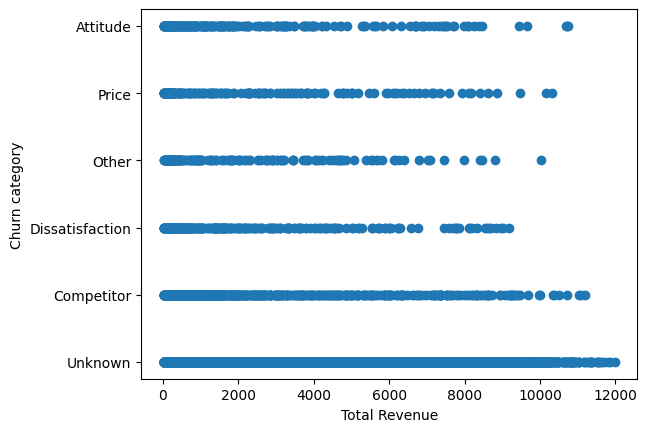

In [10]:
# Data is now clean and we will begin analysis and manipulation
mpt.scatter(df['Total_Revenue'], df['Churn_Category'])
mpt.xlabel('Total Revenue')
mpt.ylabel('Churn category')
mpt.show()

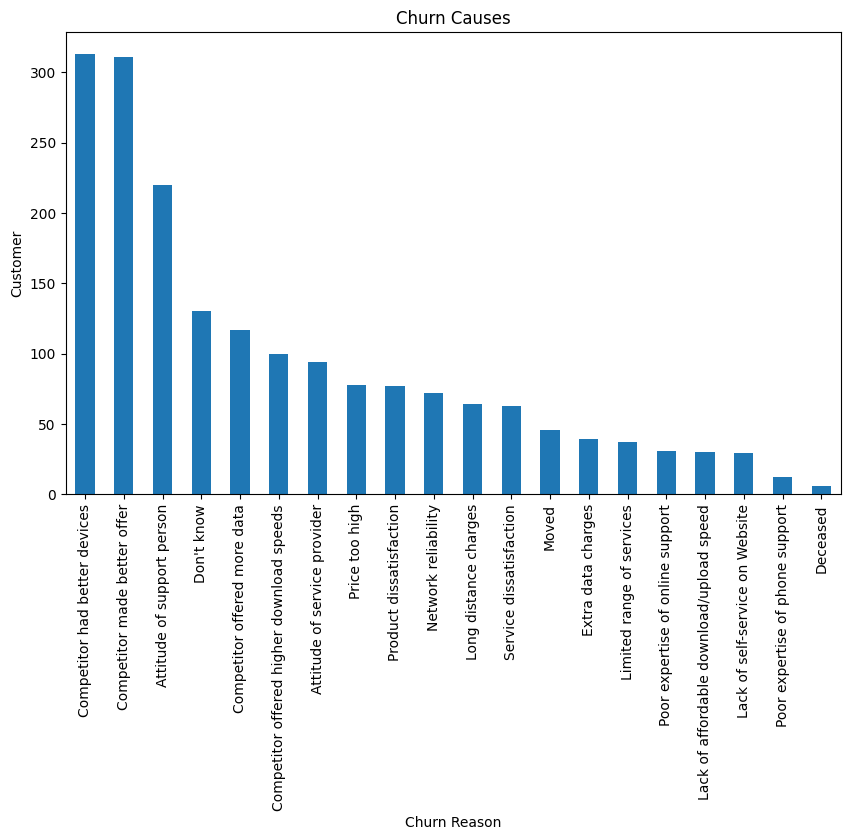

In [15]:
CHU = df[~df['Churn_Category'].str.contains('Unknown')]
CHI = df[~df['Churn_Reason'].str.contains('Unknown')]

churn_reason_counts = df['Churn_Reason'].value_counts()

mpt.figure(figsize=(10, 6))
churn_reason_counts.plot(kind='bar')
mpt.title('Churn Causes')
mpt.xlabel('Churn Reason')
mpt.ylabel('Customer')
mpt.show()

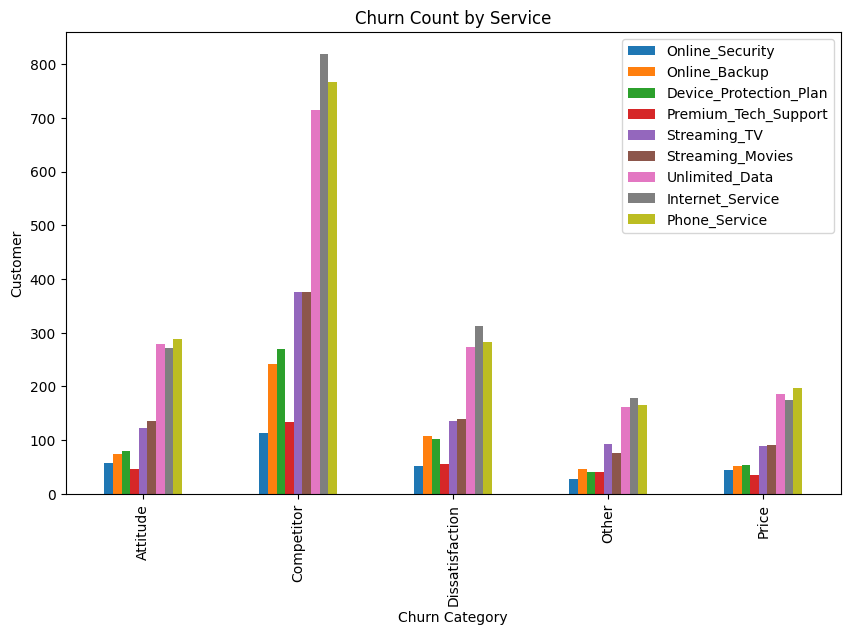

In [14]:
Servies = df[['Online_Security', 'Online_Backup', 'Device_Protection_Plan',
                  'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
                  'Unlimited_Data', 'Churn_Category', 'Internet_Service', 'Phone_Service']]

churn_counts = Servies.groupby('Churn_Category').sum()

churn_counts.plot(kind='bar', figsize=(10, 6))
mpt.xlabel('Churn Category')
mpt.ylabel('Customer')
mpt.title('Churn Count by Service')
mpt.show()



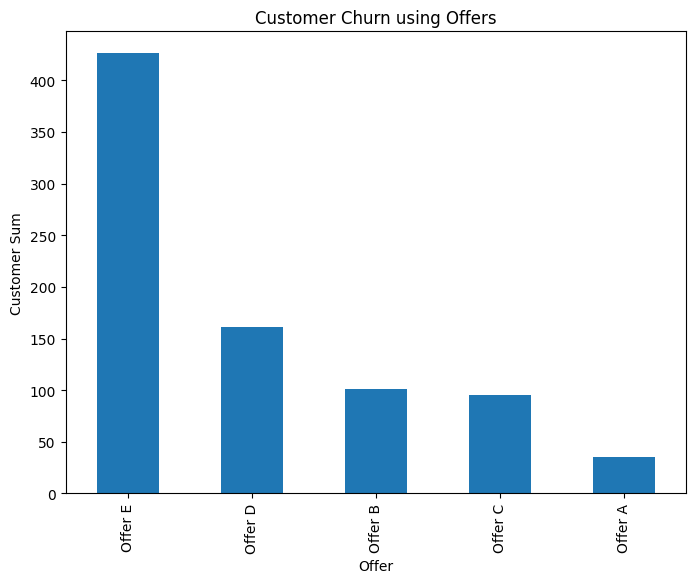

In [ ]:
churned_customers = df[df['Customer_Status'] == 'Churned']

offer_counts = churned_customers['Offer'].value_counts()

mpt.figure(figsize=(8, 6))
mpt.title('Customer Churn using Offers')
mpt.xlabel('Offer')
mpt.ylabel('Customer Sum')
offer_counts.plot(kind='bar')
mpt.show()

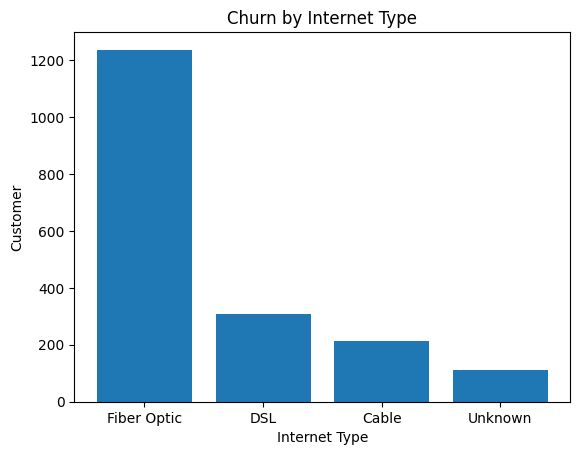

In [ ]:
Internet = df[['Internet_Type', 'Churn_Category']]

# Calculate the churn counts by internet type
churn_counts = Internet['Internet_Type'].value_counts()

# Plot the churn counts for each internet type
mpt.bar(churn_counts.index, churn_counts.values)
mpt.xlabel('Internet Type')
mpt.ylabel('Customer')
mpt.title('Churn by Internet Type')
mpt.show()

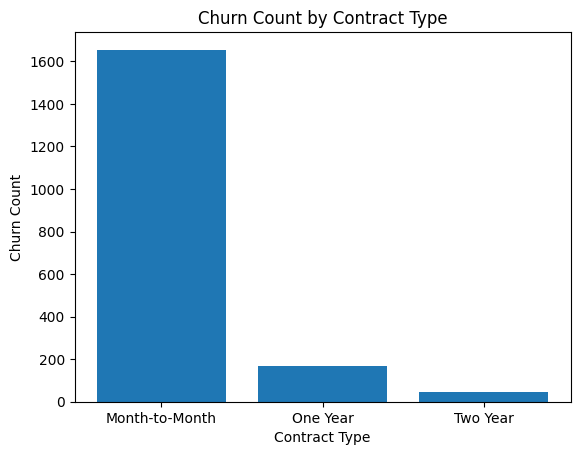

In [ ]:
Payment_Time = df[['Contract', 'Churn_Category']]

contract_counts = Payment_Time['Contract'].value_counts()

mpt.bar(contract_counts.index, contract_counts.values)
mpt.xlabel('Contract Type')
mpt.ylabel('Churn Count')
mpt.title('Churn Count by Contract Type')
mpt.xticks(rotation=0)
mpt.show()


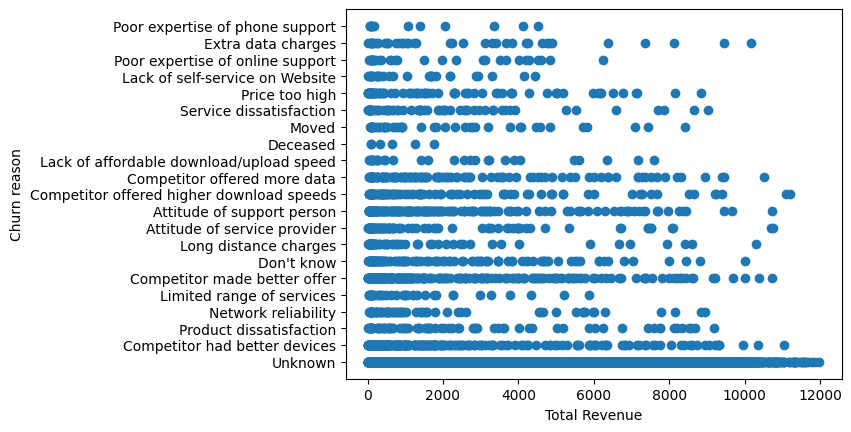

In [ ]:
# Competitor had better devices and made better offer are the reasons for Churn
mpt.scatter(df['Total_Revenue'], df['Churn_Reason'])
mpt.xlabel('Total Revenue')
mpt.ylabel('Churn reason')
mpt.show()

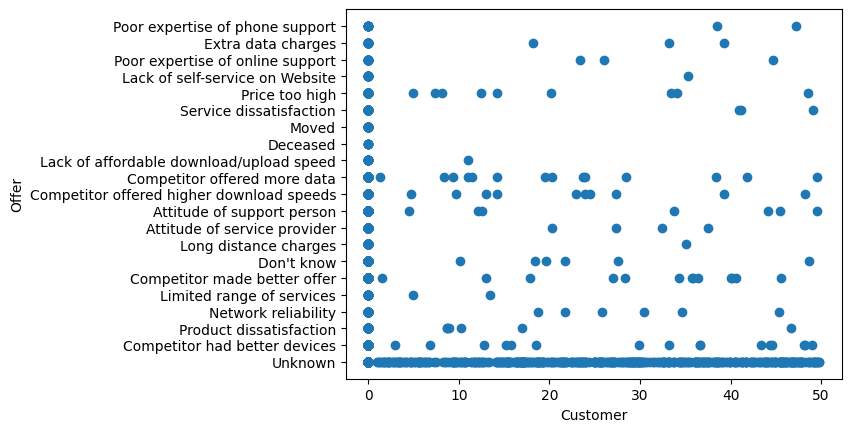

In [ ]:

mpt.scatter(df['Total_Refunds'], df['Churn_Reason'])
mpt.xlabel('Customer')
mpt.ylabel('Offer')
mpt.show()

In [ ]:
Age_reason = df.groupby('Age')['Churn_Reason'].value_counts().unstack()


In [ ]:
Age_reason

Churn_Reason,Attitude of service provider,Attitude of support person,Competitor had better devices,Competitor made better offer,Competitor offered higher download speeds,Competitor offered more data,Deceased,Don't know,Extra data charges,Lack of affordable download/upload speed,...,Limited range of services,Long distance charges,Moved,Network reliability,Poor expertise of online support,Poor expertise of phone support,Price too high,Product dissatisfaction,Service dissatisfaction,Unknown
Age,,,,,,,,,,,,,,,,,,,,,
19,NaN,1.0,4.0,3.0,2.0,1.0,NaN,1.0,1.0,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,109.0
20,1.0,3.0,5.0,7.0,1.0,3.0,1.0,3.0,NaN,NaN,...,NaN,2.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0,97.0
21,2.0,1.0,6.0,7.0,3.0,NaN,NaN,3.0,NaN,NaN,...,1.0,1.0,1.0,2.0,NaN,NaN,2.0,2.0,4.0,104.0
22,1.0,4.0,3.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,2.0,1.0,3.0,2.0,NaN,103.0
23,NaN,4.0,3.0,8.0,3.0,5.0,NaN,2.0,NaN,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,NaN,9.0,2.0,5.0,NaN,3.0,NaN,4.0,NaN,NaN,...,1.0,NaN,NaN,2.0,1.0,NaN,NaN,2.0,NaN,40.0
77,1.0,3.0,5.0,8.0,NaN,NaN,NaN,1.0,NaN,3.0,...,2.0,1.0,1.0,NaN,2.0,NaN,2.0,NaN,NaN,43.0
78,3.0,4.0,2.0,5.0,2.0,3.0,1.0,1.0,2.0,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,2.0,3.0,NaN,33.0


<Axes: title={'center': 'Churned'}>

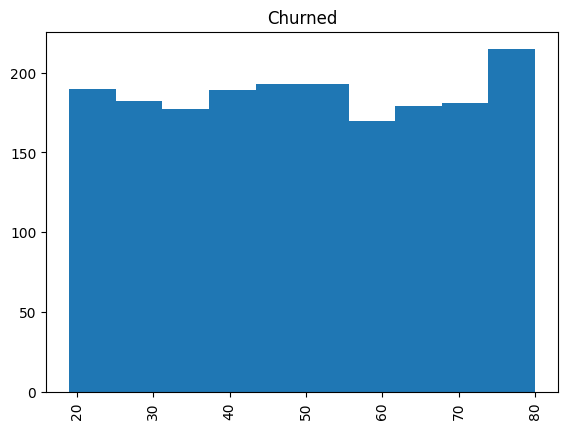

In [ ]:
df.hist('Age', 'Customer_Status')  

In [ ]:
# Save the cleaned dataset
df.to_csv("Telecom_Data_cleaned.csv",index=False)